# **Midterm Code**

## **PCA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load ds
og_ds = pd.read_csv('train_data_ads.csv')

In [2]:
nrow = og_ds.shape[0]
ncol = og_ds.shape[1]
print(f'Dimensions of the dataset: {nrow} rows and {ncol} columns')

Dimensions of the dataset: 7675517 rows and 35 columns


In [3]:
# print(ds.head())
print(og_ds.dtypes)

log_id                    int64
label                     int64
user_id                   int64
age                       int64
gender                    int64
residence                 int64
city                      int64
city_rank                 int64
series_dev                int64
series_group              int64
emui_dev                  int64
device_name               int64
device_size               int64
net_type                  int64
task_id                   int64
adv_id                    int64
creat_type_cd             int64
adv_prim_id               int64
inter_type_cd             int64
slot_id                   int64
site_id                   int64
spread_app_id             int64
hispace_app_tags          int64
app_second_class          int64
app_score               float64
ad_click_list_v001       object
ad_click_list_v002       object
ad_click_list_v003       object
ad_close_list_v001       object
ad_close_list_v002       object
ad_close_list_v003       object
pt_d    

In [4]:
# separate features and target (gender)
features = og_ds.drop('gender', axis=1)  # Drop the 'gender' column for PCA
gender = og_ds['gender']  # Target variable for coloring

In [5]:
# removing cols with non-numeric values, making a new copy of the og_ds
# axis = 0 means rows (default), axis = 1 means columns

updated_features = features.drop(["ad_click_list_v001", "ad_click_list_v002", "ad_click_list_v003", "ad_close_list_v001"
        , "ad_close_list_v002", "ad_close_list_v003", "u_newsCatInterestsST"], axis = 1)

In [6]:
# confirming we dropped 7 columns + 1 (gender) (now only have 27, not 35)
print(updated_features.shape[1] == 27)
# checking data types
print(updated_features.dtypes)

True
log_id                int64
label                 int64
user_id               int64
age                   int64
residence             int64
city                  int64
city_rank             int64
series_dev            int64
series_group          int64
emui_dev              int64
device_name           int64
device_size           int64
net_type              int64
task_id               int64
adv_id                int64
creat_type_cd         int64
adv_prim_id           int64
inter_type_cd         int64
slot_id               int64
site_id               int64
spread_app_id         int64
hispace_app_tags      int64
app_second_class      int64
app_score           float64
pt_d                  int64
u_refreshTimes        int64
u_feedLifeCycle       int64
dtype: object


In [7]:
# standardize the data
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(updated_features)

In [8]:
# apply PCA to reduce to 2 components
pca = PCA(n_components=2)
features_pca = pca.fit_transform(ds_scaled)

In [9]:
unique_genders = og_ds['gender'].nunique()        # Count of unique gender values
gender_counts = og_ds['gender'].value_counts()    # Count of each unique value

print("Number of unique gender values:", unique_genders)
print("\nCounts of each gender value:", gender_counts)

Number of unique gender values: 3

Counts of each gender value: gender
2    5946172
4    1178908
3     550437
Name: count, dtype: int64


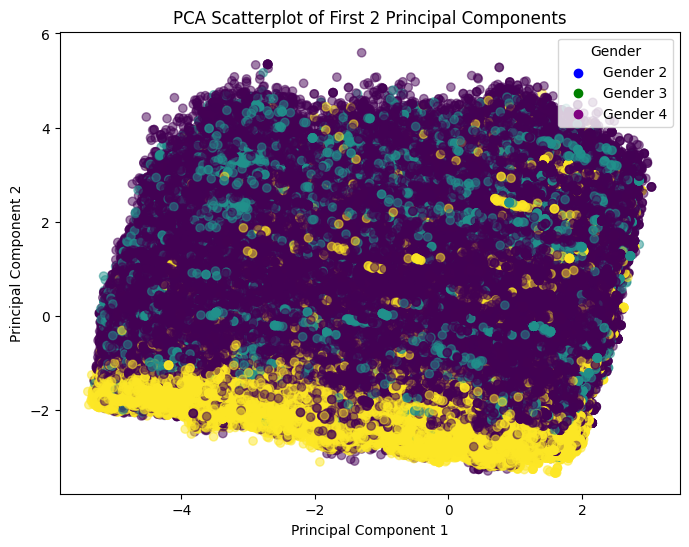

Explained variance by each component: [0.09899841 0.06834762]


In [10]:
# plot data w/ 2 pcs and color coded by gender

plt.figure(figsize=(8, 6))

# ds_pca[:, 0] selects all rows in the first column of ds_pca, which represents the first principal component values.
# ds_pca[:, 1] selects all rows in the second column, representing the second principal component values.
# alpha=0.5 sets the transparency level of the points to 0.5, making them partially see-through, which is useful when there are many points and overlapping might obscure patterns.
plt.scatter(features_pca[:, 0], features_pca[:, 1], c = gender, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatterplot of First 2 Principal Components')

# Add a legend to differentiate genders (2, 3, 4)
# dummy scatter plots with the same colors to display in the legend
plt.scatter([], [], color='blue', label='Gender 2')
plt.scatter([], [], color='green', label='Gender 3')
plt.scatter([], [], color='purple', label='Gender 4')

# Display the legend
plt.legend(title="Gender", loc="upper right")
plt.show()

# explained variance
print("Explained variance by each component:", pca.explained_variance_ratio_)

### **The principal component loadings will tell you how much each original feature contributes to each component. This can give insight into which features are influential in your reduced representation**
To identify the most important features from your PCA results, you can analyze the components (loadings) of the PCA. Each principal component is a linear combination of your original features, with a weight (or loading) assigned to each feature. By examining the magnitudes of these loadings, you can see which features contribute the most to each component.

In [11]:
# get loadings (components) for each feature in the two principal components
loadings = pca.components_

# convert loadings to a DataFrame for easier interpretation
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=updated_features.columns)

# show the absolute values of the loadings to see feature importance for each component
# print("Loadings (Feature Importance per Component):")
# print(loadings_df)

# find the top features contributing to each component by sorting based on absolute loadings
top_features_pc1 = loadings_df['PC1'].abs().sort_values(ascending=False).head(5)
top_features_pc2 = loadings_df['PC2'].abs().sort_values(ascending=False).head(5)

print("\nTop features contributing to PC1:")
print(top_features_pc1)

print("\nTop features contributing to PC2:")
print(top_features_pc2)

selected_features = list(top_features_pc1.index[:2]) + list(top_features_pc2.index[:3])
print(f"\nSelected features for model: {selected_features}")


Top features contributing to PC1:
app_score           0.515173
app_second_class    0.440346
hispace_app_tags    0.403321
creat_type_cd       0.397744
inter_type_cd       0.367749
Name: PC1, dtype: float64

Top features contributing to PC2:
series_group      0.580480
emui_dev          0.456824
series_dev        0.439417
u_refreshTimes    0.220831
residence         0.208829
Name: PC2, dtype: float64

Selected features for model: ['app_score', 'app_second_class', 'series_group', 'emui_dev', 'series_dev']


### **Running SGD (approximates SVM) with selected features**

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier

# load original dataset
og_ds = pd.read_csv('train_data_ads.csv')

# separate the target and selected features
gender = og_ds['gender']
selected_features = ['app_score', 'app_second_class', 'series_group', 'emui_dev', 'series_dev']
features_for_model = og_ds[selected_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_model, gender, test_size=0.3, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model
    # max_iter: maximum number of iterations (passes over the training dataset) that the algorithm will make before stopping
    # tol: tolerance for stopping criteria; a threshold for determining when the loss is small enough to consider that the model has converged

sgd_svm = SGDClassifier(loss='hinge', max_iter=1000, tol=.001)
sgd_svm.fit(X_train_scaled, y_train)
y_pred = sgd_svm.predict(X_test_scaled)

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # multiple classes 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8880227875983212
Precision: 0.8258414530354837
Recall: 0.8880227875983212
F1 Score: 0.8538012175880958


/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           2       0.88      0.99      0.93   1783794
           3       0.00      0.00      0.00    164794
           4       0.93      0.79      0.85    354068

    accuracy                           0.89   2302656
   macro avg       0.60      0.59      0.60   2302656
weighted avg       0.83      0.89      0.85   2302656



/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **SGD With all Features**

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier

# load original dataset
og_ds = pd.read_csv('train_data_ads.csv')

# separate the target and selected features
gender = og_ds['gender']
features_for_model = updated_features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_model, gender, test_size=0.3, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model
    # max_iter: maximum number of iterations (passes over the training dataset) that the algorithm will make before stopping
    # tol: tolerance for stopping criteria; a threshold for determining when the loss is small enough to consider that the model has converged

sgd_svm = SGDClassifier(loss='hinge', max_iter=1000, tol=.001)
sgd_svm.fit(X_train_scaled, y_train)
y_pred = sgd_svm.predict(X_test_scaled)

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # multiple classes 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8860424657439062
Precision: 0.8234765586448413
Recall: 0.8860424657439062
F1 Score: 0.8518810885711636


/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           2       0.88      0.99      0.93   1783794
           3       0.00      0.00      0.00    164794
           4       0.91      0.79      0.85    354068

    accuracy                           0.89   2302656
   macro avg       0.60      0.59      0.59   2302656
weighted avg       0.82      0.89      0.85   2302656



/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **SGD with Ryan's features**

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier

# load original dataset
og_ds = pd.read_csv('train_data_ads.csv')

# separate the target and selected features
gender = og_ds['gender']
selected_features = ['emui_dev', 'series_group', 'residence', 'age', 'city']
features_for_model = og_ds[selected_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_model, gender, test_size=0.3, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model
    # max_iter: maximum number of iterations (passes over the training dataset) that the algorithm will make before stopping
    # tol: tolerance for stopping criteria; a threshold for determining when the loss is small enough to consider that the model has converged

sgd_svm = SGDClassifier(loss='hinge', max_iter=1000, tol=.001)
sgd_svm.fit(X_train_scaled, y_train)
y_pred = sgd_svm.predict(X_test_scaled)

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # multiple classes 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8717350746268657
Precision: 0.8083572994851175
Recall: 0.8717350746268657
F1 Score: 0.838466992264916


/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           2       0.88      0.97      0.92   1783794
           3       0.00      0.00      0.00    164794
           4       0.82      0.79      0.80    354068

    accuracy                           0.87   2302656
   macro avg       0.57      0.59      0.58   2302656
weighted avg       0.81      0.87      0.84   2302656



/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/delinayetbarek/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **CURVES FOR SGD: Prec/Recall --> ONLY NUMERICAL**

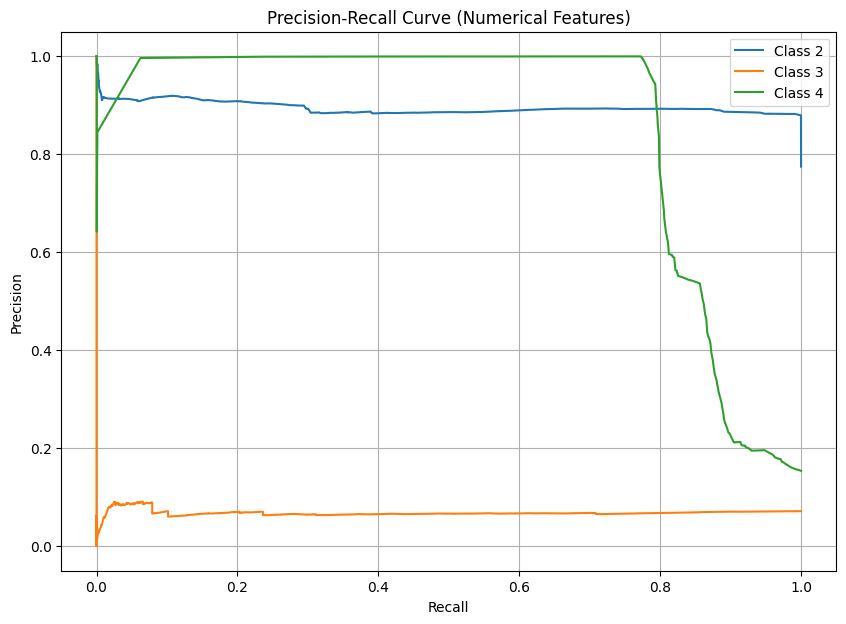

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.linear_model import SGDClassifier

og_ds = pd.read_csv('train_data_ads.csv')

# separate the target and selected features
gender = og_ds['gender']
selected_features = ['app_score', 'app_second_class', 'series_group', 'emui_dev', 'series_dev']
features_for_model = og_ds[selected_features]

# split data
X_train, X_test, y_train, y_test = train_test_split(features_for_model, gender, test_size=0.3, random_state=42)

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define model
sgd_svm = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001)
sgd_svm.fit(X_train_scaled, y_train)
y_pred = sgd_svm.predict(X_test_scaled)

# binarize output for multiclass precision-recall curve
y_test_binarized = label_binarize(y_test, classes=[2, 3, 4])
y_score = sgd_svm.decision_function(X_test_scaled)  # Get scores for each class

# plotting Precision-Recall curves for each class
plt.figure(figsize=(10, 7))

for i, class_label in enumerate([2, 3, 4]):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    
    plt.plot(recall, precision, label=f'Class {class_label}')

# plot details
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Numerical Features)')
plt.legend(loc='best')
plt.grid()
plt.show()

## **CURVES FOR SGD:ROC --> ONLY NUMERICAL**

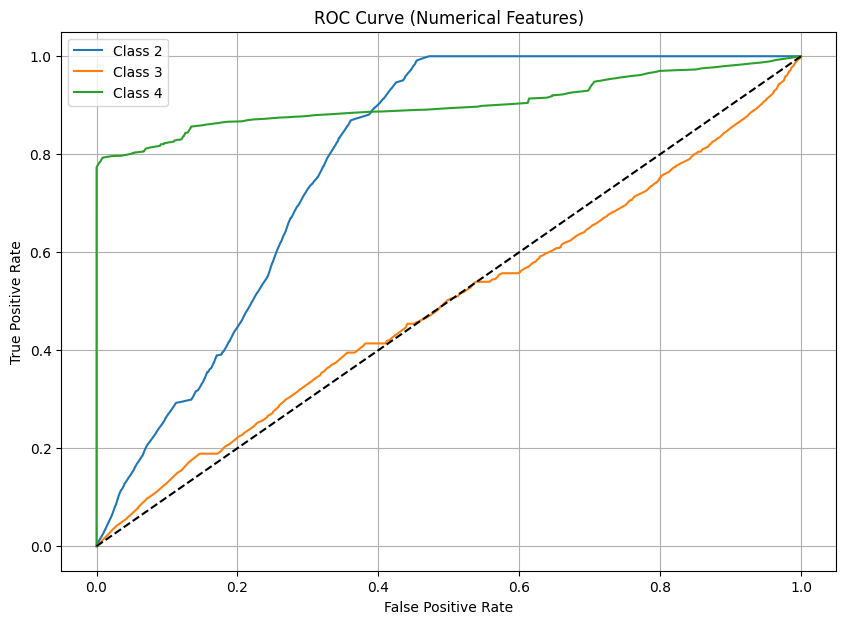

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import RocCurveDisplay

og_ds = pd.read_csv('train_data_ads.csv')

gender = og_ds['gender']
selected_features = ['app_score', 'app_second_class', 'series_group', 'emui_dev', 'series_dev']
features_for_model = og_ds[selected_features]

X_train, X_test, y_train, y_test = train_test_split(features_for_model, gender, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_svm = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001)
sgd_svm.fit(X_train_scaled, y_train)

y_test_binarized = label_binarize(y_test, classes=[2, 3, 4])
y_score = sgd_svm.decision_function(X_test_scaled)  # Get scores for each class

# Plotting ROC curves for each class
plt.figure(figsize=(10, 7))

for i, class_label in enumerate([2, 3, 4]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'Class {class_label}')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Configure plot details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Numerical Features)')
plt.legend(loc='best')
plt.grid()
plt.show()


## **Trying One-Hot Encoding**

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load original dataset
og_ds = pd.read_csv('train_data_ads.csv')

# Separate the target and selected features
gender = og_ds['gender']
selected_features = ['ad_click_list_v001', 'city', 'age', 'series_group', 'emui_dev', 'residence']
features_for_model = og_ds[selected_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_model, gender, test_size=0.3, random_state=42)

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),  # Standardize numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['ad_click_list_v001', 'city'])  # One-hot encode categorical features
    ]
)

# Build the full pipeline with SGDClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9004271588982462

Classification Report:
               precision    recall  f1-score   support

           2       0.89      0.99      0.94   1783794
           3       1.00      0.03      0.05    164794
           4       0.95      0.85      0.90    354068

    accuracy                           0.90   2302656
   macro avg       0.95      0.62      0.63   2302656
weighted avg       0.91      0.90      0.87   2302656



## **CURVES FOR SGD: Prec/Recall --> ALSO CATEGORICAL**

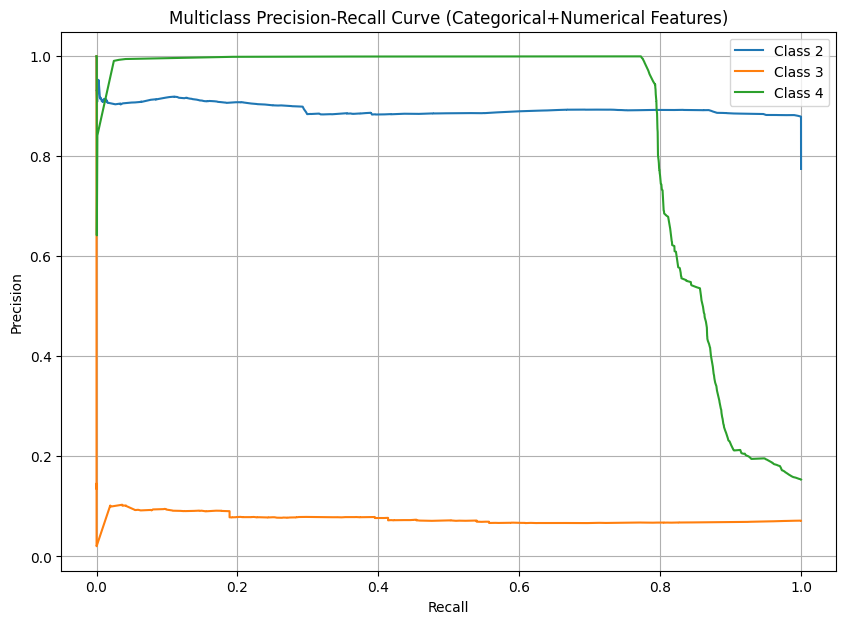

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, label_binarize, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.linear_model import SGDClassifier


# Load original dataset
og_ds = pd.read_csv('train_data_ads.csv')

# Separate the target and selected features
gender = og_ds['gender']
selected_features = ['ad_click_list_v001', 'city', 'age', 'series_group', 'emui_dev', 'residence']
features_for_model = og_ds[selected_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_model, gender, test_size=0.3, random_state=42)

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),  # Standardize numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['ad_click_list_v001', 'city'])  # One-hot encode categorical features
    ]
)

# Build the full pipeline with SGDClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# binarize output for multiclass precision-recall curve
y_test_binarized = label_binarize(y_test, classes=[2, 3, 4])
y_score = sgd_svm.decision_function(X_test_scaled)  # Get scores for each class

# plotting Precision-Recall curves for each class
plt.figure(figsize=(10, 7))

for i, class_label in enumerate([2, 3, 4]):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    
    plt.plot(recall, precision, label=f'Class {class_label}')

# plot details
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve (Categorical+Numerical Features)')
plt.legend(loc='best')
plt.grid()
plt.show()

## **CURVES FOR SGD:ROC --> ALSO CATEGORICAL**

0.7871452897487577
0.4917016160006087
0.9040912122015362


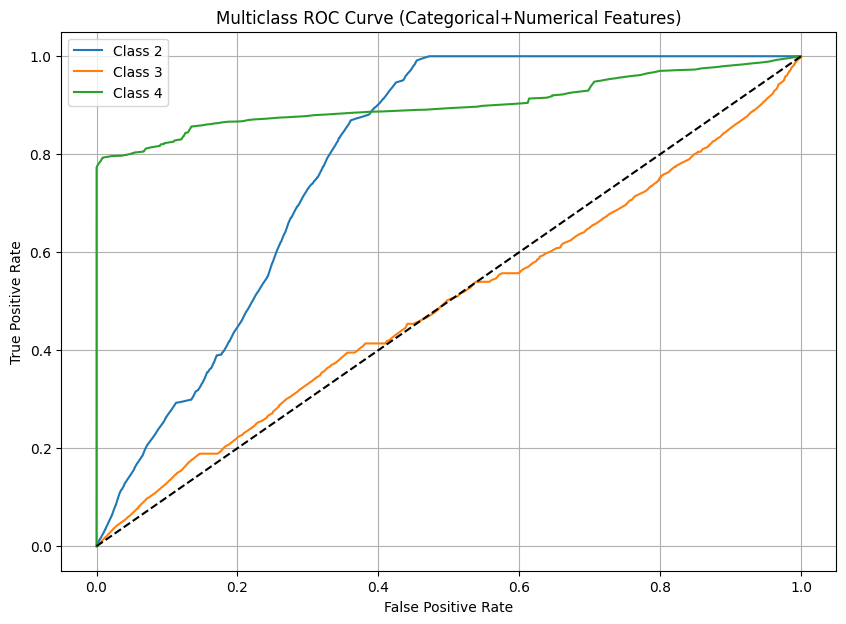

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, label_binarize, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.linear_model import SGDClassifier


# Load original dataset
og_ds = pd.read_csv('train_data_ads.csv')

# Separate the target and selected features
gender = og_ds['gender']
selected_features = ['ad_click_list_v001', 'city', 'age', 'series_group', 'emui_dev', 'residence']
features_for_model = og_ds[selected_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_model, gender, test_size=0.3, random_state=42)

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),  # Standardize numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['ad_click_list_v001', 'city'])  # One-hot encode categorical features
    ]
)

# Build the full pipeline with SGDClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# binarize output for multiclass precision-recall curve
y_test_binarized = label_binarize(y_test, classes=[2, 3, 4])
y_score = sgd_svm.decision_function(X_test_scaled)  # Get scores for each class

# Plotting ROC curves for each class
plt.figure(figsize=(10, 7))

for i, class_label in enumerate([2, 3, 4]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    
    plt.plot(fpr, tpr, label=f'Class {class_label}')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Configure plot details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Categorical+Numerical Features)')
plt.legend(loc='best')
plt.grid()
plt.show()


In [20]:
# SVM --> TOOK TOO LONG

# import pandas as pd
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.linear_model import SGDClassifier

# # load original dataset
# og_ds = pd.read_csv('train_data_ads.csv')

# # separate the target and selected features
# gender = og_ds['gender']
# selected_features = ['app_score', 'app_second_class', 'series_group', 'emui_dev', 'series_dev']
# features_for_model = og_ds[selected_features]

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features_for_model, gender, test_size=0.3, random_state=42)

# # standardize the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # CROSS VALIDATION FOR HYPERPARAM CHOICE

# # parameter grid
# param_grid = {
#     'C': [0.1, 1, 10],  # regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'], 
#     'gamma': [0.1, 1, 10] 
# }

# # GridSearchCV with 5 fold cross-validation
#     # n_jobs=-1 enables parallel processing to speed up computation
# grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# print("Best parameters:", grid_search.best_params_)

# # train the final model with the best parameters
# best_svm = grid_search.best_estimator_
# print(best_svm)

# svm_model = SVC(kernel='linear', C=1.0, random_state=42)
# svm_model.fit(X_train_scaled, y_train)
# y_pred = best_svm.predict(X_test_scaled)

# # Metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')  # multiple classes 
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# # Display results
# print("Best Parameters from GridSearch:", grid_search.best_params_)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

# # Detailed classification report
# print("\nClassification Report:\n", classification_report(y_test, y_pred))